##Data Loading From the Google Drive

Google drive mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Get a list of all CSV files in the specified directory.



In [2]:
import os

directory_path = '/content/drive/MyDrive/extracted_archive/MachineLearningCVE'
all_files = os.listdir(directory_path)
csv_files = [f for f in all_files if f.endswith('.csv')]

## Read and combine

Read each CSV file into a pandas DataFrame and combine them into a single DataFrame.


In [3]:
import pandas as pd

directory_path = '/content/drive/MyDrive/extracted_archive/MachineLearningCVE'
dataframes = []

for file_name in csv_files:
  file_path = os.path.join(directory_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

## Display combined data

Displaying the Head of the Combined dataset whcih means the top 5 rows of the dataset

*Because,
To verify that the data was loaded correctly and combined into a single DataFrame, I need to display the first few rows of the `combined_df`.*

In [4]:
display(combined_df.head())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Display number of rows
Display the total number of rows in the combined DataFrame.

In [5]:
print(f"The combined dataset has {combined_df.shape[0]} rows.")

The combined dataset has 2830743 rows.


## Display number of null values

Display the number of null values for each column in the combined DataFrame.

In [6]:
display(combined_df.isnull().sum())

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


## Basic Inspection of Data

In [7]:
print(combined_df.shape)  # (rows, columns)

(2830743, 79)


In [8]:
print(combined_df.info())  # Data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [9]:
print(combined_df.head())  # First 5 rows

    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [10]:
print(combined_df.describe()) # Basic Statistical Analysis

        Destination Port   Flow Duration   Total Fwd Packets  \
count       2.830743e+06    2.830743e+06        2.830743e+06   
mean        8.071483e+03    1.478566e+07        9.361160e+00   
std         1.828363e+04    3.365374e+07        7.496728e+02   
min         0.000000e+00   -1.300000e+01        1.000000e+00   
25%         5.300000e+01    1.550000e+02        2.000000e+00   
50%         8.000000e+01    3.131600e+04        2.000000e+00   
75%         4.430000e+02    3.204828e+06        5.000000e+00   
max         6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.830743e+06                 2.830743e+06   
mean              1.039377e+01                 5.493024e+02   
std               9.973883e+02                 9.993589e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00               

## Handling Missing Values

In [11]:
# Check missing values
print(combined_df.isnull().sum())
print(combined_df.isnull().sum().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
1358


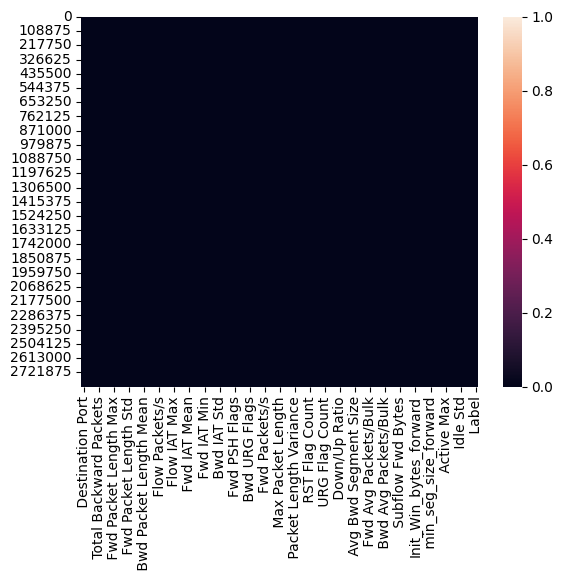

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(combined_df.isnull(), cbar=True)
plt.show()

*The Above Plot Indicates there are nearly no null values are present in the dataset*

*More Detailed analysis on Null Values*

🔍 MISSING VALUES ANALYSIS
⚠️  Found 1 columns with missing values:
          Column  Missing_Count  Missing_Percent
14  Flow Bytes/s           1358         0.196044


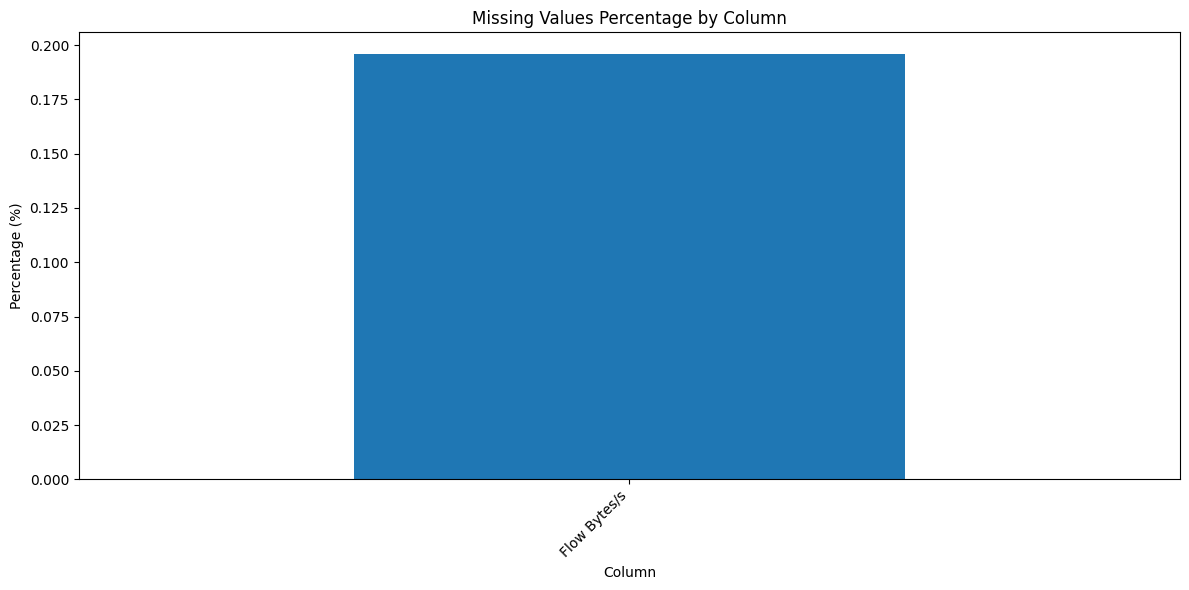

In [13]:
# Missing values analysis
print("🔍 MISSING VALUES ANALYSIS")
print("="*50)

# Count missing values
missing_counts = combined_df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Create missing values summary
missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"⚠️  Found {len(missing_df)} columns with missing values:")
    print(missing_df)

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_df.set_index('Column')['Missing_Percent'].plot(kind='bar')
    plt.title('Missing Values Percentage by Column')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

In [14]:
# Handle missing values - ZERO TOLERANCE approach
print("🔧 HANDLING MISSING VALUES - COMPLETE REMOVAL")
print("="*50)

missing_before = combined_df.isnull().sum()
missing_cols = combined_df.columns[combined_df.isnull().any()].tolist()
total_missing_before = combined_df.isnull().sum().sum()

print(f"📊 Total missing values found: {total_missing_before}")
print(f"📊 Columns with missing values: {len(missing_cols)}")

if missing_cols:
    print("\n🔍 Detailed missing value treatment:")

    # Special handling for Flow Bytes/s column
    if 'Flow_Bytes_per_s' in missing_cols:
        print(f"\n📌 Flow_Bytes_per_s: {combined_df['Flow_Bytes_per_s'].isnull().sum()} missing values")
        # For Flow Bytes/s, calculate from total bytes and duration if possible
        if 'Flow_Duration' in combined_df.columns and 'Total_Fwd_Packets' in combined_df.columns:
            # Where Flow_Bytes_per_s is missing but we have duration
            mask = combined_df['Flow_Bytes_per_s'].isnull() & (combined_df['Flow_Duration'] > 0)
            if mask.sum() > 0:
                # Try to recalculate
                total_bytes = combined_df['Total_Length_of_Fwd_Packets'] + combined_df['Total_Length_of_Bwd_Packets']
                combined_df.loc[mask, 'Flow_Bytes_per_s'] = total_bytes[mask] / (combined_df.loc[mask, 'Flow_Duration'] / 1000000)  # Duration in microseconds
                print(f"   ✅ Recalculated {mask.sum()} values from total bytes and duration")

        # Fill remaining with 0 (no flow = 0 bytes/s)
        combined_df['Flow_Bytes_per_s'].fillna(0, inplace=True)
        print(f"   ✅ Filled remaining with 0")

    # Handle all flow-related features
    flow_features = [col for col in missing_cols if 'Flow' in col or 'Bytes' in col or 'IAT' in col]
    for col in flow_features:
        if col in combined_df.columns and combined_df[col].isnull().sum() > 0:
            missing_count = combined_df[col].isnull().sum()
            combined_df[col].fillna(0, inplace=True)
            print(f"✅ {col}: Filled {missing_count} missing values with 0")

    # Handle packet-related features
    packet_features = [col for col in missing_cols if 'Packet' in col or 'Length' in col]
    for col in packet_features:
        if col in combined_df.columns and combined_df[col].isnull().sum() > 0:
            missing_count = df[col].isnull().sum()
            combined_df[col].fillna(0, inplace=True)
            print(f"✅ {col}: Filled {missing_count} missing values with 0")

    # Handle remaining numeric features
    remaining_numeric = [col for col in missing_cols
                        if col not in flow_features + packet_features
                        and combined_df[col].dtype in ['float64', 'int64']]
    for col in remaining_numeric:
        if combined_df[col].isnull().sum() > 0:
            missing_count = combined_df[col].isnull().sum()
            # Use median for non-flow features
            median_val = combined_df[col].median()
            combined_df[col].fillna(median_val, inplace=True)
            print(f" {col}: Filled {missing_count} missing values with median ({median_val:.2f})")

    # Handle categorical features
    categorical_cols = [col for col in missing_cols if combined_df[col].dtype == 'object']
    for col in categorical_cols:
        if combined_df[col].isnull().sum() > 0:
            missing_count = combined_df[col].isnull().sum()
            combined_df[col].fillna('Unknown', inplace=True)
            print(f" {col}: Filled {missing_count} missing values with 'Unknown'")

# Final verification - ENSURE ZERO MISSING VALUES
remaining_missing = combined_df.isnull().sum().sum()
print(f"\n🔍 FINAL CHECK:")
print(f"   Total missing values after treatment: {remaining_missing}")

if remaining_missing > 0:
    # If any missing values remain, show which columns
    still_missing = combined_df.columns[combined_df.isnull().any()].tolist()
    print(f"\n  WARNING: Still have missing values in: {still_missing}")

    # Force fill ALL remaining with 0
    combined_df.fillna(0, inplace=True)
    print(" Force-filled all remaining missing values with 0")

# Triple check
final_missing = combined_df.isnull().sum().sum()
assert final_missing == 0, "Still have missing values!"
print(f"\n✅✅✅ SUCCESS: ZERO missing values confirmed! Total: {final_missing}")

# Show before/after summary
print(f"\n📊 Missing Value Treatment Summary:")
print(f"   Before: {total_missing_before} missing values")
print(f"   After:  {final_missing} missing values")
print(f"   Cleaned: {total_missing_before} values handled")

🔧 HANDLING MISSING VALUES - COMPLETE REMOVAL
📊 Total missing values found: 1358
📊 Columns with missing values: 1

🔍 Detailed missing value treatment:
✅ Flow Bytes/s: Filled 1358 missing values with 0


/tmp/ipython-input-1018948032.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna(0, inplace=True)



🔍 FINAL CHECK:
   Total missing values after treatment: 0

✅✅✅ SUCCESS: ZERO missing values confirmed! Total: 0

📊 Missing Value Treatment Summary:
   Before: 1358 missing values
   After:  0 missing values
   Cleaned: 1358 values handled


In [15]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


##Analyzing the Target Vriable

🎯 TARGET VARIABLE ANALYSIS
Unique attack types: 15

📊 Attack Type Distribution:


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


/tmp/ipython-input-485200546.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, y=label_col, order=attack_distribution.index, palette='viridis')


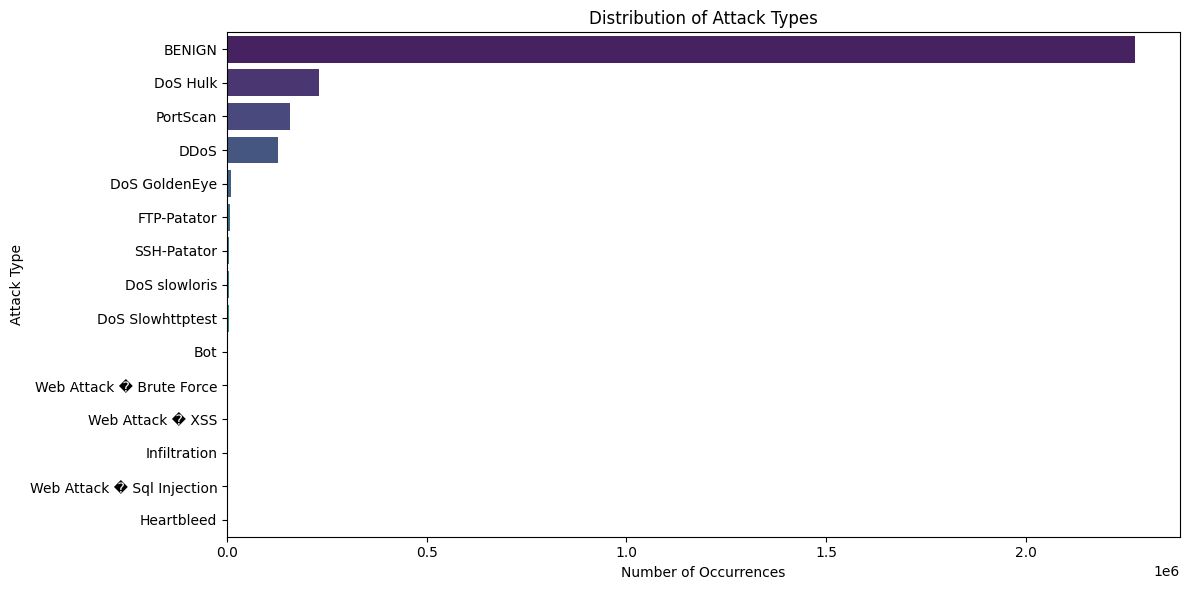

In [16]:
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*50)

# Clean up column names by stripping whitespace
combined_df.columns = combined_df.columns.str.strip()

# Check label column
label_col = 'Label'  # Adjust if your label column has different name
print(f"Unique attack types: {combined_df[label_col].nunique()}")

# Display the distribution of attack types
attack_distribution = combined_df[label_col].value_counts()
print("\n📊 Attack Type Distribution:")
display(attack_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y=label_col, order=attack_distribution.index, palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Number of Occurrences')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

## Identify minority and majority classes


Identify minority and majority classes by analyzing the value counts of the 'Label' column in the combined dataset.


In [17]:
label_counts = combined_df['Label'].value_counts()
print("Value counts for the 'Label' column:")
display(label_counts)

Value counts for the 'Label' column:


,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


**Reasoning**:
Analyze the label_counts Series to identify the minority and majority classes and list the top 4 to 5 minority classes.



## Separate data by class

Split the combined DataFrame into separate DataFrames for each unique value in the 'Label' column. This is necessary to prepare the data for applying resampling techniques to specific classes.

In [21]:
# Get unique classes from the combined_df
unique_classes = combined_df['Label'].unique()

# Create a dictionary to store dataframes for each class
class_dataframes = {}

# Separate data into class-specific dataframes
for class_name in unique_classes:
  class_dataframes[class_name] = combined_df[combined_df['Label'] == class_name].copy()

# Display the number of samples in each class dataframe to verify the split
print("Number of samples in each class dataframe:")
for class_name, df in class_dataframes.items():
  print(f"{class_name}: {len(df)} samples")

Number of samples in each class dataframe:
BENIGN: 2273097 samples
DDoS: 128027 samples
PortScan: 158930 samples
Bot: 1966 samples
Infiltration: 36 samples
Web Attack � Brute Force: 1507 samples
Web Attack � XSS: 652 samples
Web Attack � Sql Injection: 21 samples
FTP-Patator: 7938 samples
SSH-Patator: 5897 samples
DoS slowloris: 5796 samples
DoS Slowhttptest: 5499 samples
DoS Hulk: 231073 samples
DoS GoldenEye: 10293 samples
Heartbleed: 11 samples


In [22]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

minority_classes_to_oversample = [
    'DoS GoldenEye',
    'FTP-Patator',
    'SSH-Patator',
    'DoS slowloris',
    'DoS Slowhttptest',
    'Bot',
    'Web Attack � Brute Force',
    'Web Attack � XSS',
    'Infiltration',
    'Web Attack � Sql Injection',
    'Heartbleed'
]

target_minority_samples_after_oversampling = 1230000


df_majority = class_dataframes['BENIGN'].copy()

oversampled_minority_dataframes = {}
smote = SMOTE(random_state=42)

print(f"Applying SMOTE to the specified minority classes, aiming for {target_minority_samples_after_oversampling} samples each.")

for class_name in minority_classes_to_oversample:
    print(f"\nProcessing class: {class_name}")
    df_minority = class_dataframes[class_name].copy()

    if len(df_minority) >= target_minority_samples_after_oversampling:
        print(f"  Class {class_name} already has {len(df_minority)} samples, which is >= target {target_minority_samples_after_oversampling}. No oversampling needed.")
        oversampled_minority_dataframes[class_name] = df_minority.copy()
        continue

    majority_subset_size = min(len(df_majority), max(len(df_minority) * 2, target_minority_samples_after_oversampling))
    df_majority_subset = df_majority.sample(n=majority_subset_size, random_state=42)

    # Combine the minority class and majority subset
    df_combined_subset = pd.concat([df_minority, df_majority_subset], ignore_index=True)

    # Separate features (X) and target (y) from the combined subset
    X_combined_subset = df_combined_subset.drop('Label', axis=1)
    y_combined_subset = df_combined_subset['Label']

    # Select only numeric columns
    numeric_cols_subset = X_combined_subset.select_dtypes(include=np.number).columns
    X_combined_subset_numeric = X_combined_subset[numeric_cols_subset]

    # Identify columns with infinite values in this subset
    infinite_cols_subset = X_combined_subset_numeric.columns[np.isinf(X_combined_subset_numeric).any()].tolist()

    if infinite_cols_subset:
        print(f"  Found infinite values in columns: {infinite_cols_subset}")
        # Replace infinite values with NaN
        X_combined_subset[infinite_cols_subset] = X_combined_subset[infinite_cols_subset].replace([np.inf, -np.inf], np.nan)
        # Fill NaN values with 0 (or consider median/mean if appropriate)
        X_combined_subset[infinite_cols_subset] = X_combined_subset[infinite_cols_subset].fillna(0)
        print(f"  Handled infinite values in {infinite_cols_subset}.")
        # Verify
        if np.isinf(X_combined_subset[infinite_cols_subset]).sum().sum() > 0 or X_combined_subset[infinite_cols_subset].isnull().sum().sum() > 0:
             print("  WARNING: Infinite or NaN values still found after handling in subset!")

    # --- Apply SMOTE to the combined subset ---
    # Define the sampling strategy: oversample the current minority class to the target count
    sampling_strategy = {class_name: target_minority_samples_after_oversampling}

    print(f"  Original samples for {class_name}: {len(df_minority)}. Applying SMOTE with sampling strategy: {sampling_strategy}")

    try:
        X_resampled_subset, y_resampled_subset = smote.fit_resample(X_combined_subset, y_combined_subset)
        print(f"  SMOTE applied successfully to subset.")

        # Filter to get only the oversampled minority class samples
        resampled_minority_subset_df = pd.DataFrame(X_resampled_subset, columns=X_combined_subset.columns)
        resampled_minority_subset_df['Label'] = y_resampled_subset

        # Keep only the rows corresponding to the minority class that was oversampled
        oversampled_df = resampled_minority_subset_df[resampled_minority_subset_df['Label'] == class_name].copy()

        oversampled_minority_dataframes[class_name] = oversampled_df
        print(f"  Generated {len(oversampled_df)} oversampled samples for {class_name}.")

    except Exception as e:
        print(f"  Error applying SMOTE to {class_name}: {e}")
        print(f"  Skipping oversampling for {class_name} due to error. Keeping original data.")
        # If SMOTE fails, keep the original minority data for this class
        oversampled_minority_dataframes[class_name] = df_minority.copy()


# Now, combine the oversampled minority dataframes with the majority class and other non-oversampled minority classes
print("\nCombining oversampled minority data with other classes...")

# Start with the original majority class (BENIGN)
final_df = class_dataframes['BENIGN'].copy()

# Add the oversampled top minority classes
print("Adding oversampled minority classes:")
for class_name in minority_classes_to_oversample:
    if class_name in oversampled_minority_dataframes:
        final_df = pd.concat([final_df, oversampled_minority_dataframes[class_name]], ignore_index=True)
        print(f"  Added {len(oversampled_minority_dataframes[class_name])} samples for {class_name} to the final dataset.")


# Add the other minority classes that were not in the oversampled list (these are the larger minority classes)
other_classes = [cls for cls in unique_classes if cls not in minority_classes_to_oversample and cls != 'BENIGN']
print(f"\nAdding other classes ({len(other_classes)} classes) that were not oversampled:")
for class_name in other_classes:
    if class_name in class_dataframes:
        final_df = pd.concat([final_df, class_dataframes[class_name]], ignore_index=True)
        print(f"  Added {len(class_dataframes[class_name])} samples for {class_name}.")


print("\nFinal dataset created.")
print(f"Shape of the final dataset: {final_df.shape}")

# Verify the class distribution of the final dataset
print("\nDistribution of the final dataset:")
display(final_df['Label'].value_counts())

# Update the combined_df to the new balanced dataframe
combined_df = final_df

print("\nUpdated combined_df with the balanced dataset.")

Applying SMOTE to the specified minority classes, aiming for 1230000 samples each.

Processing class: DoS GoldenEye
  Found infinite values in columns: ['Flow Bytes/s', 'Flow Packets/s']
  Handled infinite values in ['Flow Bytes/s', 'Flow Packets/s'].
  Original samples for DoS GoldenEye: 10293. Applying SMOTE with sampling strategy: {'DoS GoldenEye': 1230000}
  SMOTE applied successfully to subset.
  Generated 1230000 oversampled samples for DoS GoldenEye.

Processing class: FTP-Patator
  Found infinite values in columns: ['Flow Bytes/s', 'Flow Packets/s']
  Handled infinite values in ['Flow Bytes/s', 'Flow Packets/s'].
  Original samples for FTP-Patator: 7938. Applying SMOTE with sampling strategy: {'FTP-Patator': 1230000}
  SMOTE applied successfully to subset.
  Generated 1230000 oversampled samples for FTP-Patator.

Processing class: SSH-Patator
  Found infinite values in columns: ['Flow Bytes/s', 'Flow Packets/s']
  Handled infinite values in ['Flow Bytes/s', 'Flow Packets/s'].
 

,count
Label,
BENIGN,2273097
DoS GoldenEye,1230000
FTP-Patator,1230000
SSH-Patator,1230000
DoS slowloris,1230000
DoS Slowhttptest,1230000
Bot,1230000
Web Attack � Brute Force,1230000
Web Attack � XSS,1230000



Updated combined_df with the balanced dataset.


In [23]:
combined_df.shape

(16321127, 79)

## Display Label Distribution (after resampling)

Display the distribution of the 'Label' column in the combined DataFrame using a bar graph to visualize the effect of oversampling.

📊 Attack Type Distribution after resampling:


,count
Label,
BENIGN,2273097
DoS GoldenEye,1230000
FTP-Patator,1230000
SSH-Patator,1230000
DoS slowloris,1230000
DoS Slowhttptest,1230000
Bot,1230000
Web Attack � Brute Force,1230000
Web Attack � XSS,1230000


/tmp/ipython-input-1081146393.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, y='Label', order=label_distribution.index, palette='viridis')


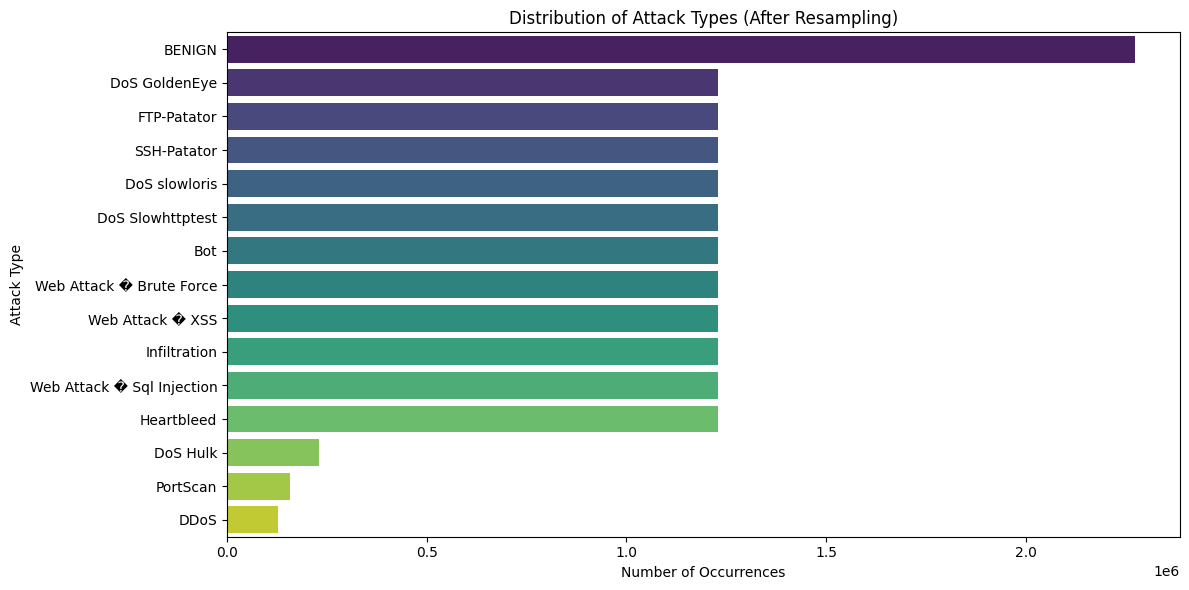

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts of the 'Label' column
label_distribution = combined_df['Label'].value_counts()

# Display the distribution
print("📊 Attack Type Distribution after resampling:")
display(label_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y='Label', order=label_distribution.index, palette='viridis')
plt.title('Distribution of Attack Types (After Resampling)')
plt.xlabel('Number of Occurrences')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

## Save combined dataset to CSV and upload to Google Drive

Save the balanced `combined_df` DataFrame to a CSV file and store it in your Google Drive at the specified path.

In [25]:
import os

# Define the path in Google Drive
drive_path = '/content/drive/MyDrive/extracted_archive'
file_name = 'balanced_combined_dataset.csv'
output_path = os.path.join(drive_path, file_name)

# Ensure the directory exists (optional, but good practice)
os.makedirs(drive_path, exist_ok=True)

# Save the combined DataFrame to a CSV file in the specified Google Drive path
# Set index=False to avoid writing the DataFrame index as a column in the CSV
print(f"Saving the combined dataset to {output_path}...")
combined_df.to_csv(output_path, index=False)

print("Dataset saved successfully to Google Drive.")

Saving the combined dataset to /content/drive/MyDrive/extracted_archive/balanced_combined_dataset.csv...
Dataset saved successfully to Google Drive.
